In [21]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer            
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

%matplotlib inline

In [22]:
# читаем файл с данными в табличном виде
mails = pd.read_csv('spam.csv', encoding = 'latin-1')
mails.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [23]:
# делаем таблицу более приятной глазу и подготавливаем её для обработки моделями
mails = mails.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 'columns') 
mails = mails.rename(columns={'v1': 'label', 'v2': 'message'}) 
mails = mails.reindex(columns=['message', 'label']) 
mails['b_label'] = mails['label'].map({'ham': 0, 'spam': 1}) # присваиваем бинарные значения для категорий спам / не спам
mails.head()

,message,label,b_label
0,"Go until jurong point, crazy.. Available only ...",ham,0
1,Ok lar... Joking wif u oni...,ham,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,1
3,U dun say so early hor... U c already then say...,ham,0
4,"Nah I don't think he goes to usf, he lives aro...",ham,0


In [24]:
# считаем общее количество SMS с пометкой Spam и Ham
mails['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [25]:
Y = mails['b_label'].values
# разделяем тренировочную и тестовую выборки в пропорции 70/30
mails_train, mails_test, Ytrain, Ytest = train_test_split(mails['message'], Y, test_size=0.30) 

In [26]:
# с помощью модели TfidfVectorizer создаем матрицу признаков X
tfidf = TfidfVectorizer(decode_error='ignore') 
Xtrain = tfidf.fit_transform(mails_train)
Xtest = tfidf.transform(mails_test)

In [27]:
# создаём модель на основе наивного байесовского классификатора, использующую данные из tfidf, смотрим на результат
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 0.9730769230769231
test score: 0.9539473684210527


In [28]:
# повторяем то же самое, но с использованием модели CountVectorizer для сравнения результатов
tfidf = CountVectorizer(decode_error='ignore') 
Xtrain = tfidf.fit_transform(mails_train)
Xtest = tfidf.transform(mails_test)

model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))
# спойлер: статистика получилась лучше => будем использовать модель CountVectorizer

train score: 0.9943589743589744
test score: 0.9808612440191388


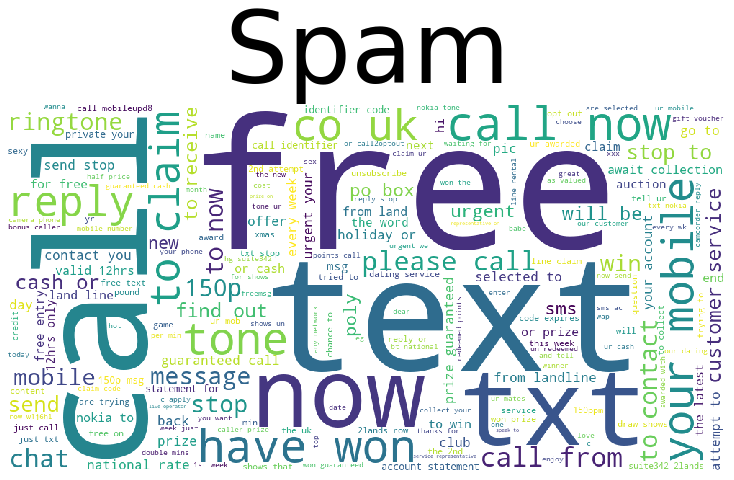

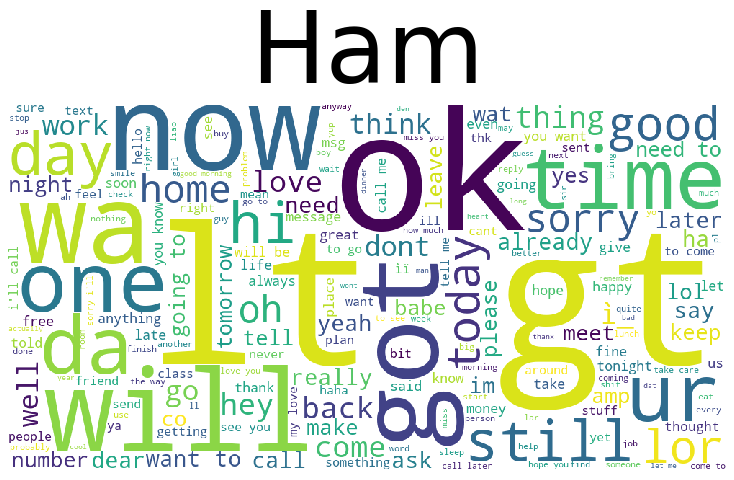

In [29]:
# создаём функцию, визуализирующую список слов, наиболее часто встречающихся в соответствующих категориях нашего датасета
def pic(i, b_label):
    words = ' '.join(list(mails[mails['b_label'] == i]['message']))
    words = words.lower() # не забываем преобразовать символы в нижний регистр, чтобы не рассматривать одинаковые слова в разном регистре как разные
    wc = WordCloud(background_color = 'white', width = 1000, height = 512).generate(words)
    plt.figure(figsize = (10, 8), facecolor = 'w')
    plt.imshow(wc) # задаём цвет, размер и фон фигуры / цвет и размер заголовка
    plt.axis('off')
    plt.tight_layout(pad = 0)
    plt.title(b_label, color = 'k', size = 100)
    plt.show()
pic(1, 'Spam') # выводим значение для соответствующих категорий
pic(0, 'Ham')

In [30]:
# создаем функцию, которая классифицирует сообщение пользователя как "Спам" или "Не спам"
def spam_filter(sms):
    examples = []
    examples.append(sms)
    example_counts = tfidf.transform(examples)
    predictions = model.predict(example_counts) # прогоняем сообщение через полученную ранее модель
    for i in predictions:
        if i == 1:
            print('Spam')
        else:
            print('Ham')
spam_filter(input('Enter your text message: '))

Enter your text message:  hey! how r u?


Ham
